In [1]:
import os
os.chdir('../')

In [2]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
embeddings = np.load('data/embeddings.npy')
labels = np.load('data/embeddings.labels.npy')

In [4]:
labels

array(['BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', ...,
       'yin_yang', 'yin_yang', 'yin_yang'], dtype='<U17')

In [5]:
t = PCA(n_components=2, random_state=2021)

In [6]:
new_embeddings = t.fit_transform(embeddings)

In [7]:
t.explained_variance_

array([17.609552, 15.696172], dtype=float32)

In [8]:
t.explained_variance_ratio_

array([0.04550245, 0.04055834], dtype=float32)

In [9]:
new_embeddings

array([[ 1.9441345 ,  1.0849023 ],
       [ 1.9764283 ,  2.2554157 ],
       [-1.5641326 , -2.0674336 ],
       ...,
       [ 1.9085057 , -0.70896494],
       [ 0.8095423 , -1.2168958 ],
       [ 0.8938718 ,  0.03027676]], dtype=float32)

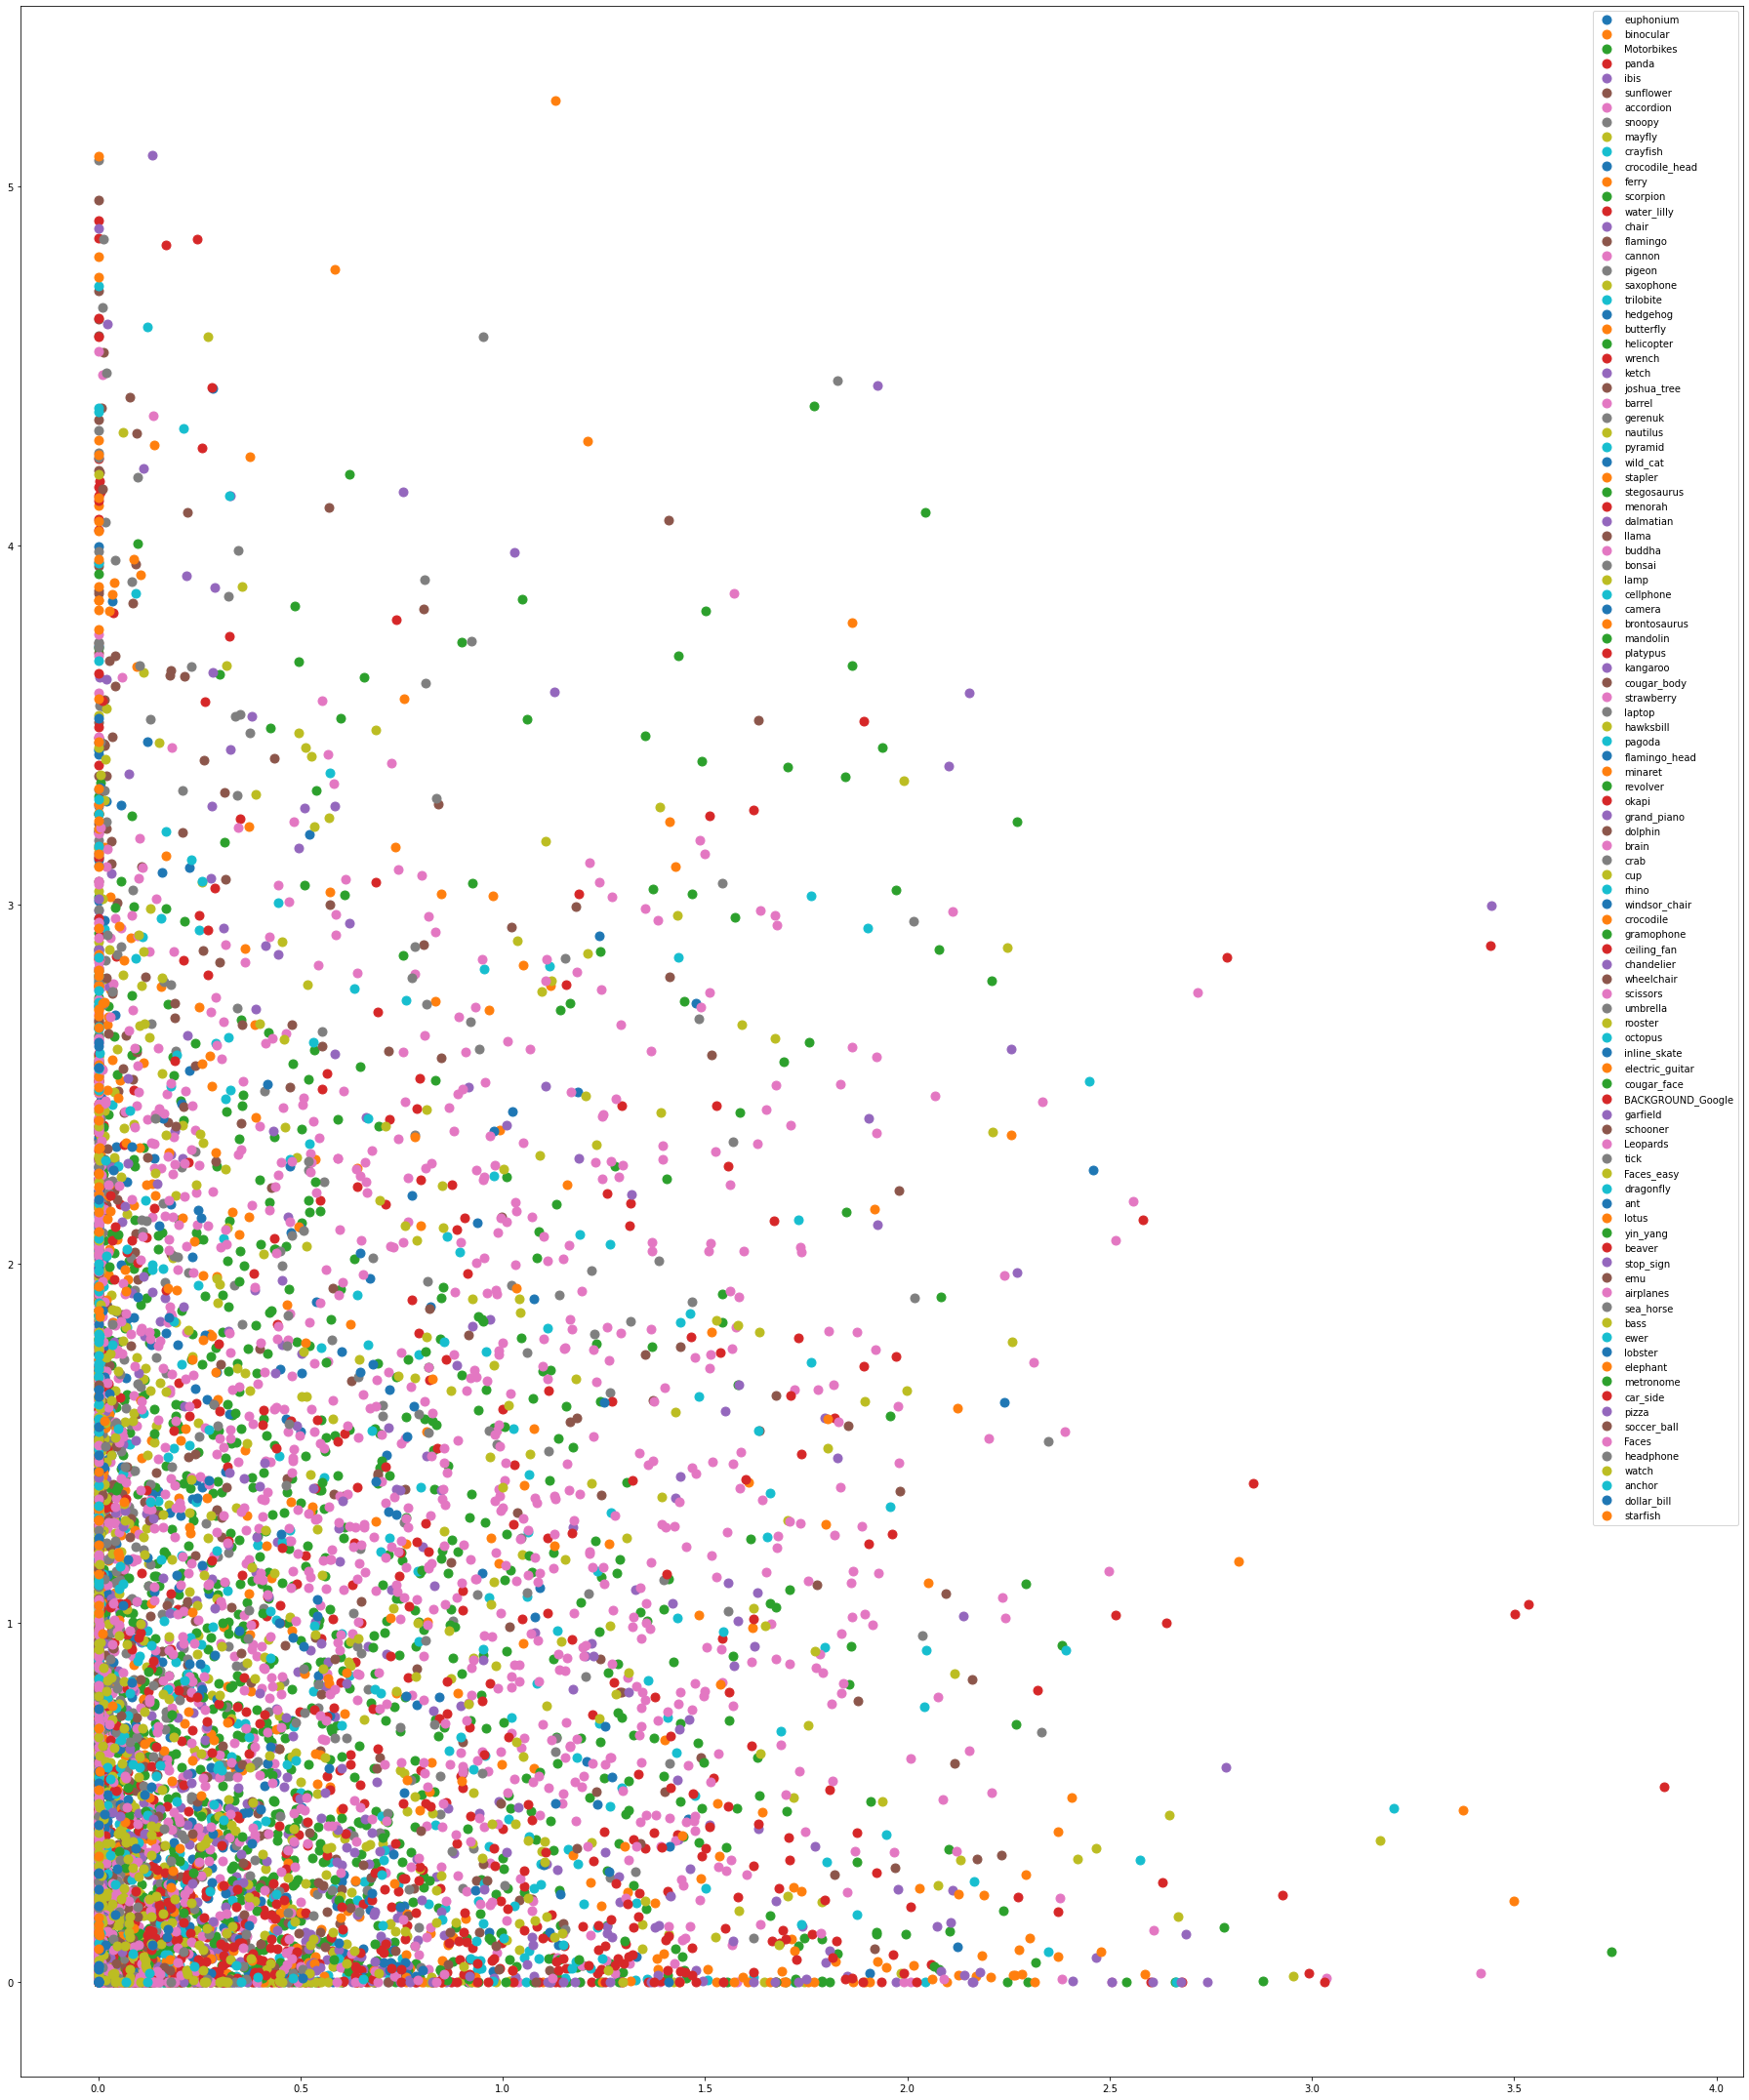

In [10]:
fig, ax = plt.subplots(figsize=(25,30))
ax.margins(0.05)
for label in set(labels):
    x = embeddings[labels==label]
    ax.plot(x[:, 0], x[:, 1], marker='o', linestyle='', ms=9, label=label)
ax.legend()
plt.tight_layout()
plt.savefig('images/pca.vis.png')

## Export Embeddings and Labels for Tensorflow Projector

In [11]:
np.savetxt('data/embeddings.txt', embeddings, delimiter='\t')

In [12]:
np.savetxt('data/embeddings.labels.txt', labels, delimiter='\t', fmt='%s')